# Winter comparison

This notebook calculates mean monthly values for each data variable, and then compares mean values between winter 2018-19 and winter 2019-20. This allows us to visualize any differences between the two winter seasons. 

# 1) Read data 
Here, we set the start and end years that define our analysis time period. We read in the ICESat-2 monthly files and the book dataset (produced in the data wrangling notebook) from the google storage bucket. You can also set interpolation preferences for the ICESat-2 data, which has some holes. By setting `interpolation=True`, the code calls an interpolation function that is defined in the module `misc_utils.py`. Interpolation takes some time to run; to go through the notebook faster, set `interpolation=False`. 

In [16]:
# Import notebook dependencies
import os
import xarray as xr
import numpy as np
import pandas as pd

# Import utils 
from utils.misc_utils import restrictRegionally, is2_interp2d, getWinterDateRange
from utils.read_data_utils import read_is2_data, read_book_data
from utils.plotting_utils import plot_winter_means, arcticComparisonMaps

# Remove warnings to improve display
import warnings 
warnings.filterwarnings('ignore')

# Plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
from textwrap import wrap
import matplotlib as mpl
import matplotlib.pyplot as plt

GeoAxes._pcolormesh_patched = Axes.pcolormesh
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 100

In [2]:
# Set desired date range 
winter18_19 = pd.date_range(start="2018-11-01", end="2019-04-01", freq="MS") # ICESat-2 started collecting data in Nov of 2018
winter19_20 = pd.date_range(start="2019-09-01", end="2020-04-01", freq="MS")
winter20_21 = pd.date_range(start="2020-09-01", end="2020-12-01", freq="MS") # We don't have data for 2021 yet for several of the datasets
winter_months = winter18_19.append(winter19_20).append(winter20_21)

# Read book data 
book_ds = read_book_data()
book_ds = book_ds.sel(time=winter_months) # Get winter months

# Read ICESat-2 data 
is2_ds = read_is2_data() 
is2_ds = is2_ds.sel(time=winter_months) # Get winter months

# Decide whether or not to interpolate the ICESat-2 data or use the raw product, which has some holes in the data
interpolate = False
if (interpolate == True): 
    print("Interpolating ICESat-2 data...")
    cdr_da = book_ds["cdr_seaice_conc_monthly"] # Get CDR data
    is2_ds = is2_interp2d(is2_ds, cdr_da, method='nearest', interp_var='all')
    print("Complete!")
    
# Combine datasets 
ds = xr.merge([is2_ds, book_ds])
ds = ds.drop_vars("projection")

# 2) Restrict data to the Inner Arctic
The Inner Arctic is defined as the combined area of the Central Arctic, Beaufort Sea, Chukchi Sea, E Siberian Sea and the Laptev Sea. See the mapping notebook for more detail on this region and the methods used to restrict the data. 

In [3]:
regionKeyList = [10,11,12,13,15] #Inner Arctic
ds = restrictRegionally(ds, regionKeyList)

Regions selected: Inner Arctic


# 3) Visualize mean differences
Compute mean values for each winter season, and plot.<br>
See the `plotting_utils` module for more information on the functions used.

## ICESat-2 sea ice thickness

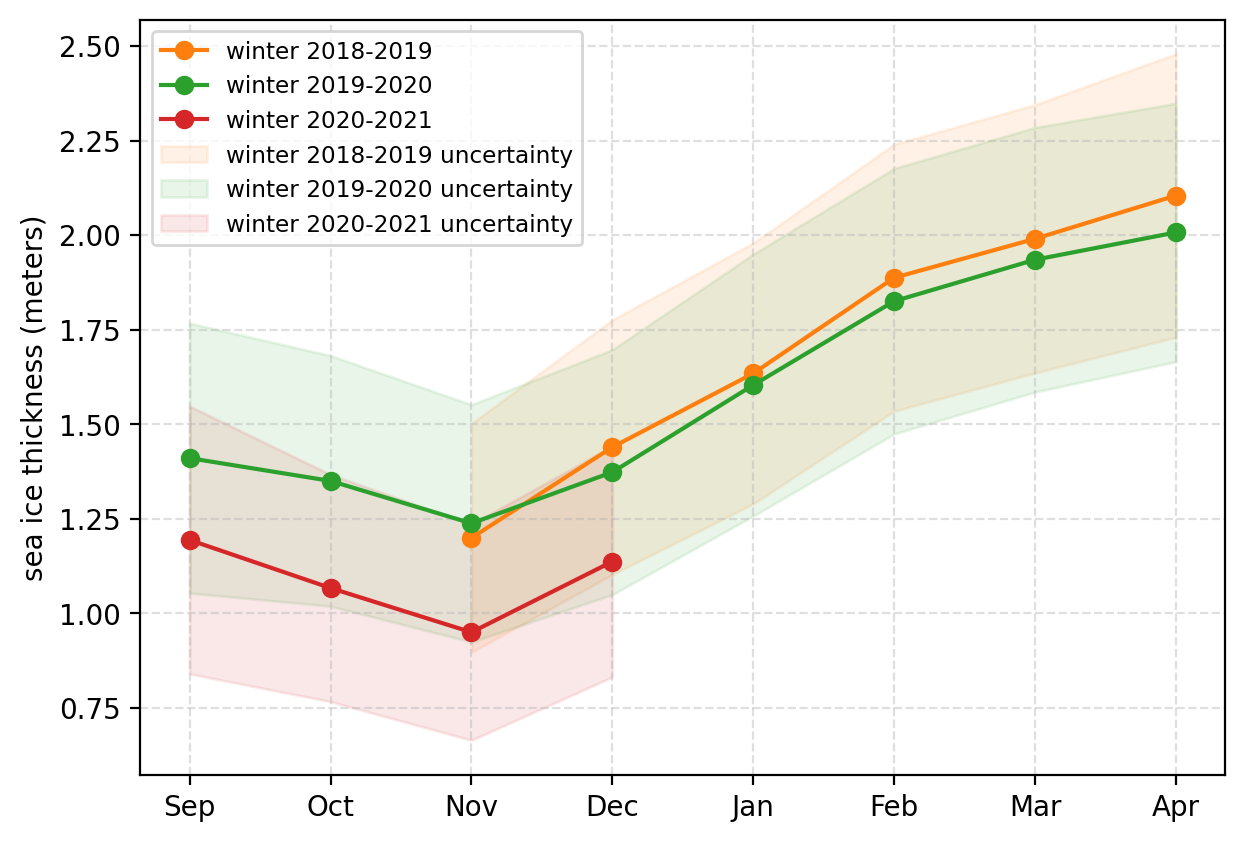

In [4]:
da = ds["ice_thickness"]
start_year = "2018"
end_year= "2021"
plot_winter_means(da, start_year=start_year, end_year=end_year, da_uncertainty=ds["ice_thickness_unc"]) # Generate line plot

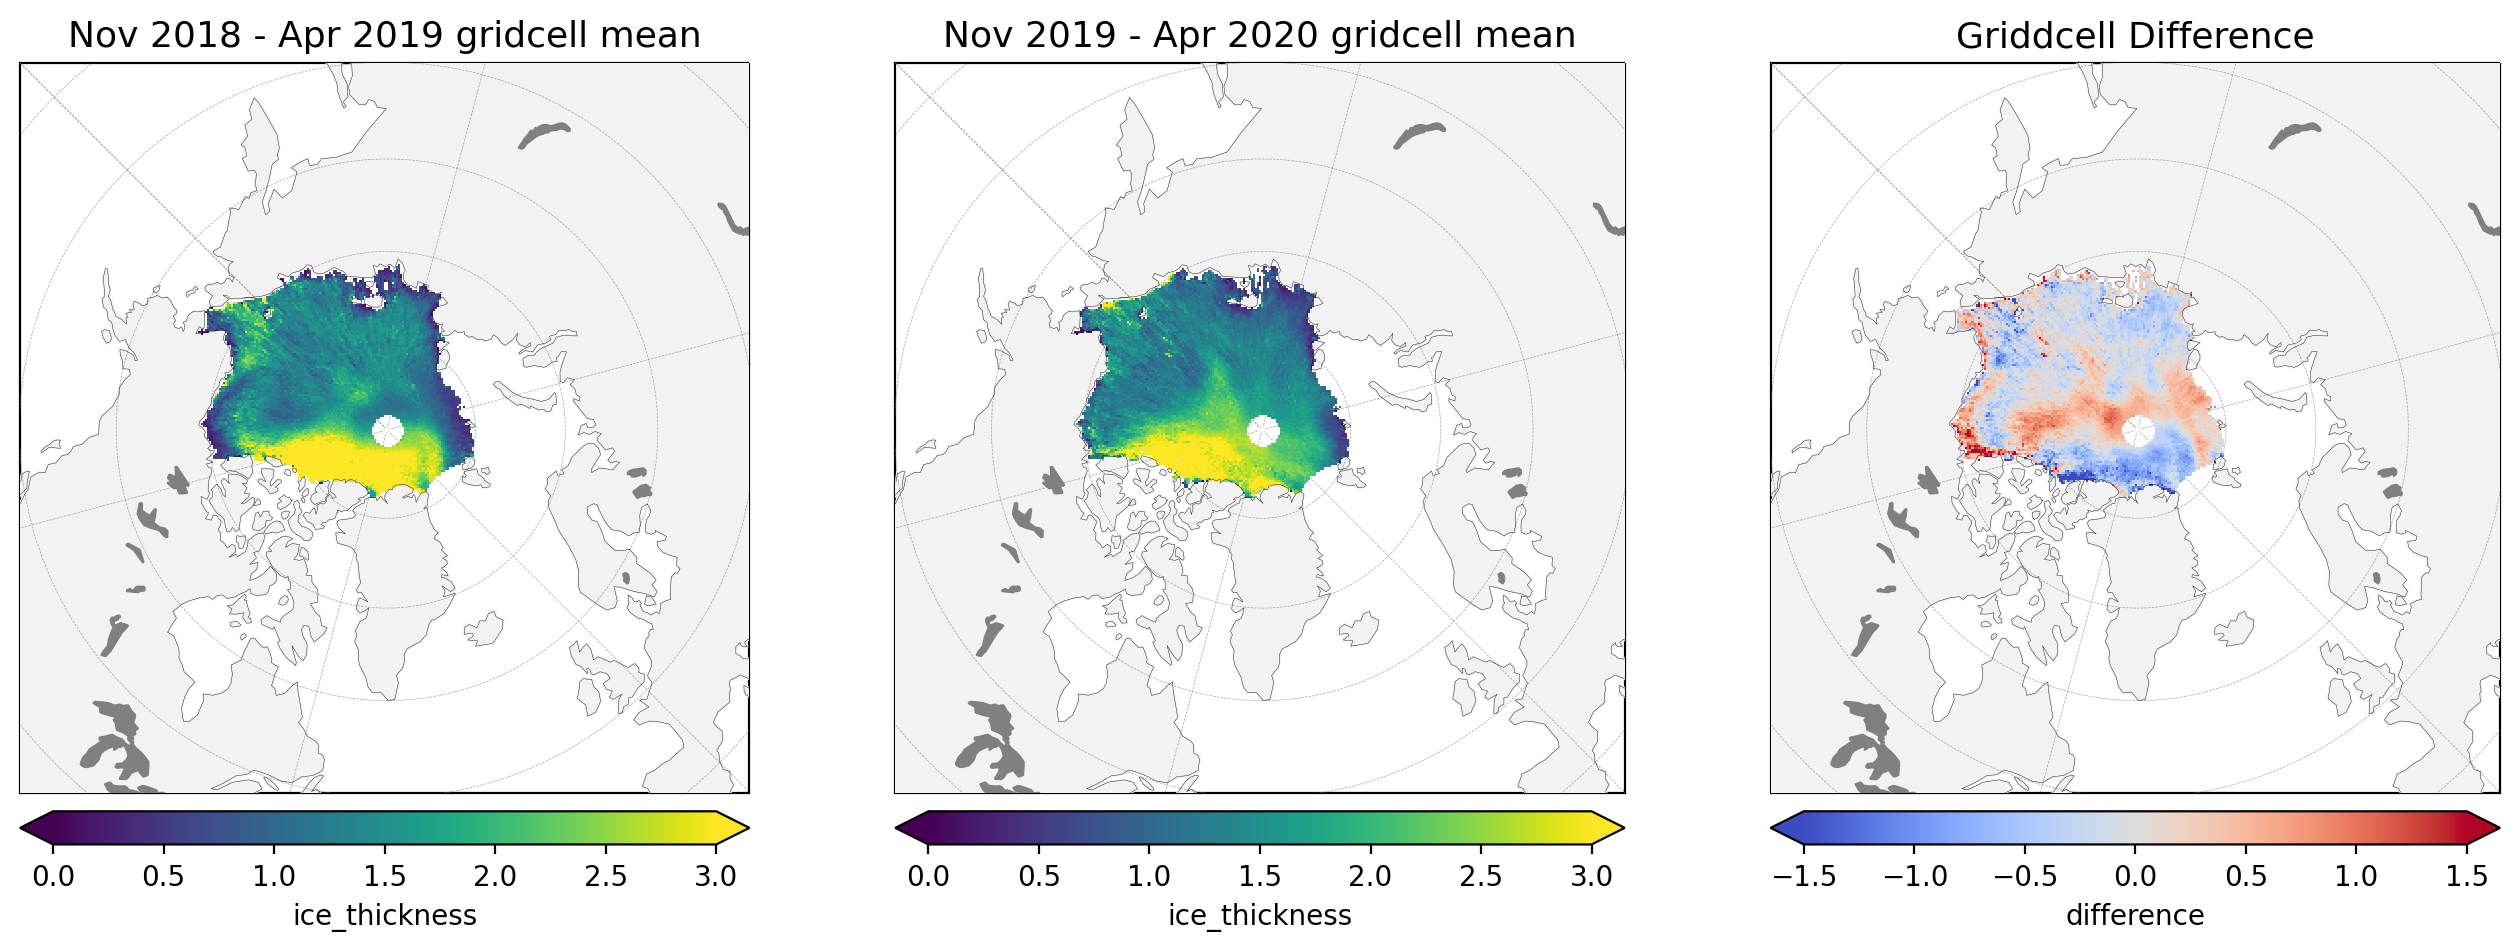

In [5]:
da_mean_winter18_19 = da.sel(time=pd.date_range(start="2018-11", end="2019-04", freq="MS")).mean(dim="time")
da_mean_winter19_20 = da.sel(time=pd.date_range(start="2019-11", end="2020-04", freq="MS")).mean(dim="time")

arcticComparisonMaps(data1=da_mean_winter18_19, title1="Nov 2018 - Apr 2019 gridcell mean", 
                           data2=da_mean_winter19_20, title2="Nov 2019 - Apr 2020 gridcell mean", 
                           vmin=0, vmax=3, vmin_diff=-1.5, vmax_diff=1.5)

## PIOMAS sea ice thickness 

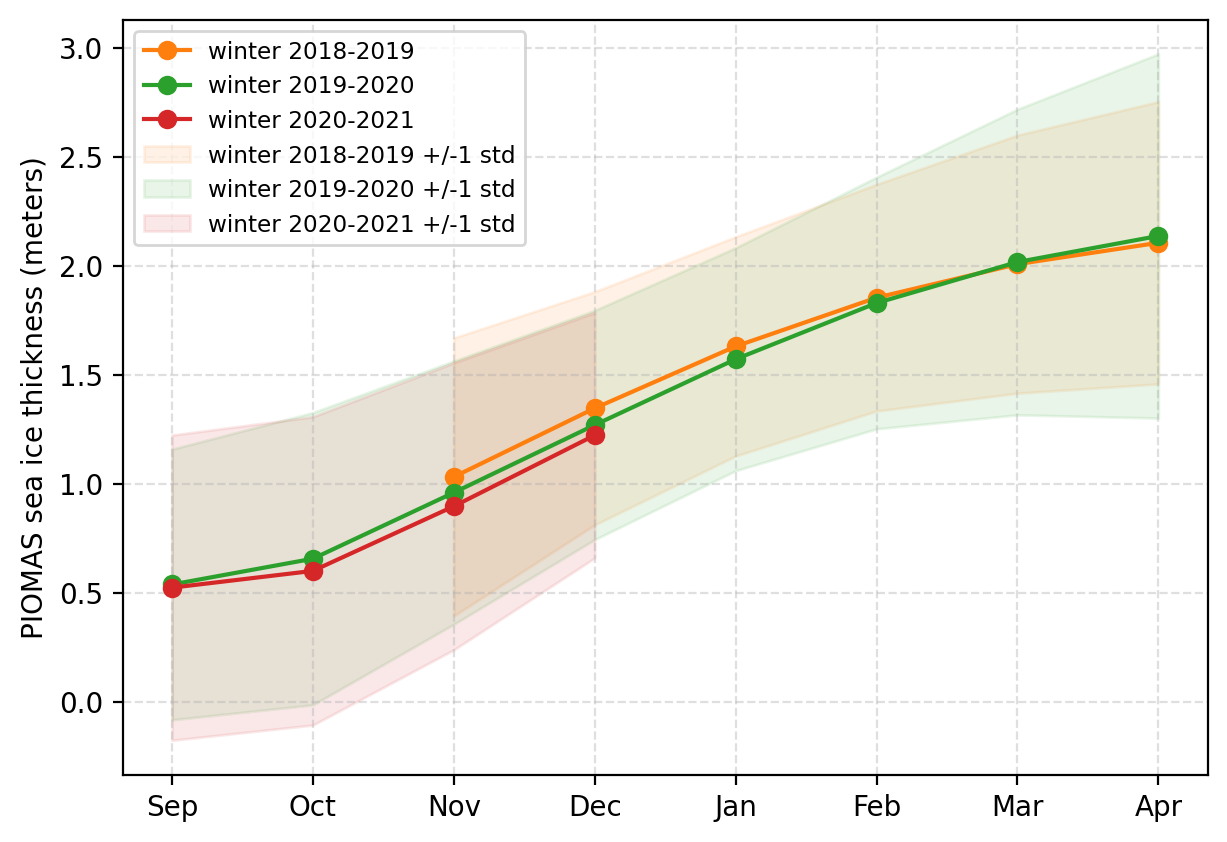

In [6]:
da = ds["piomas_ice_thickness"]
plot_winter_means(da, start_year=start_year, end_year=end_year) # Generate line plot

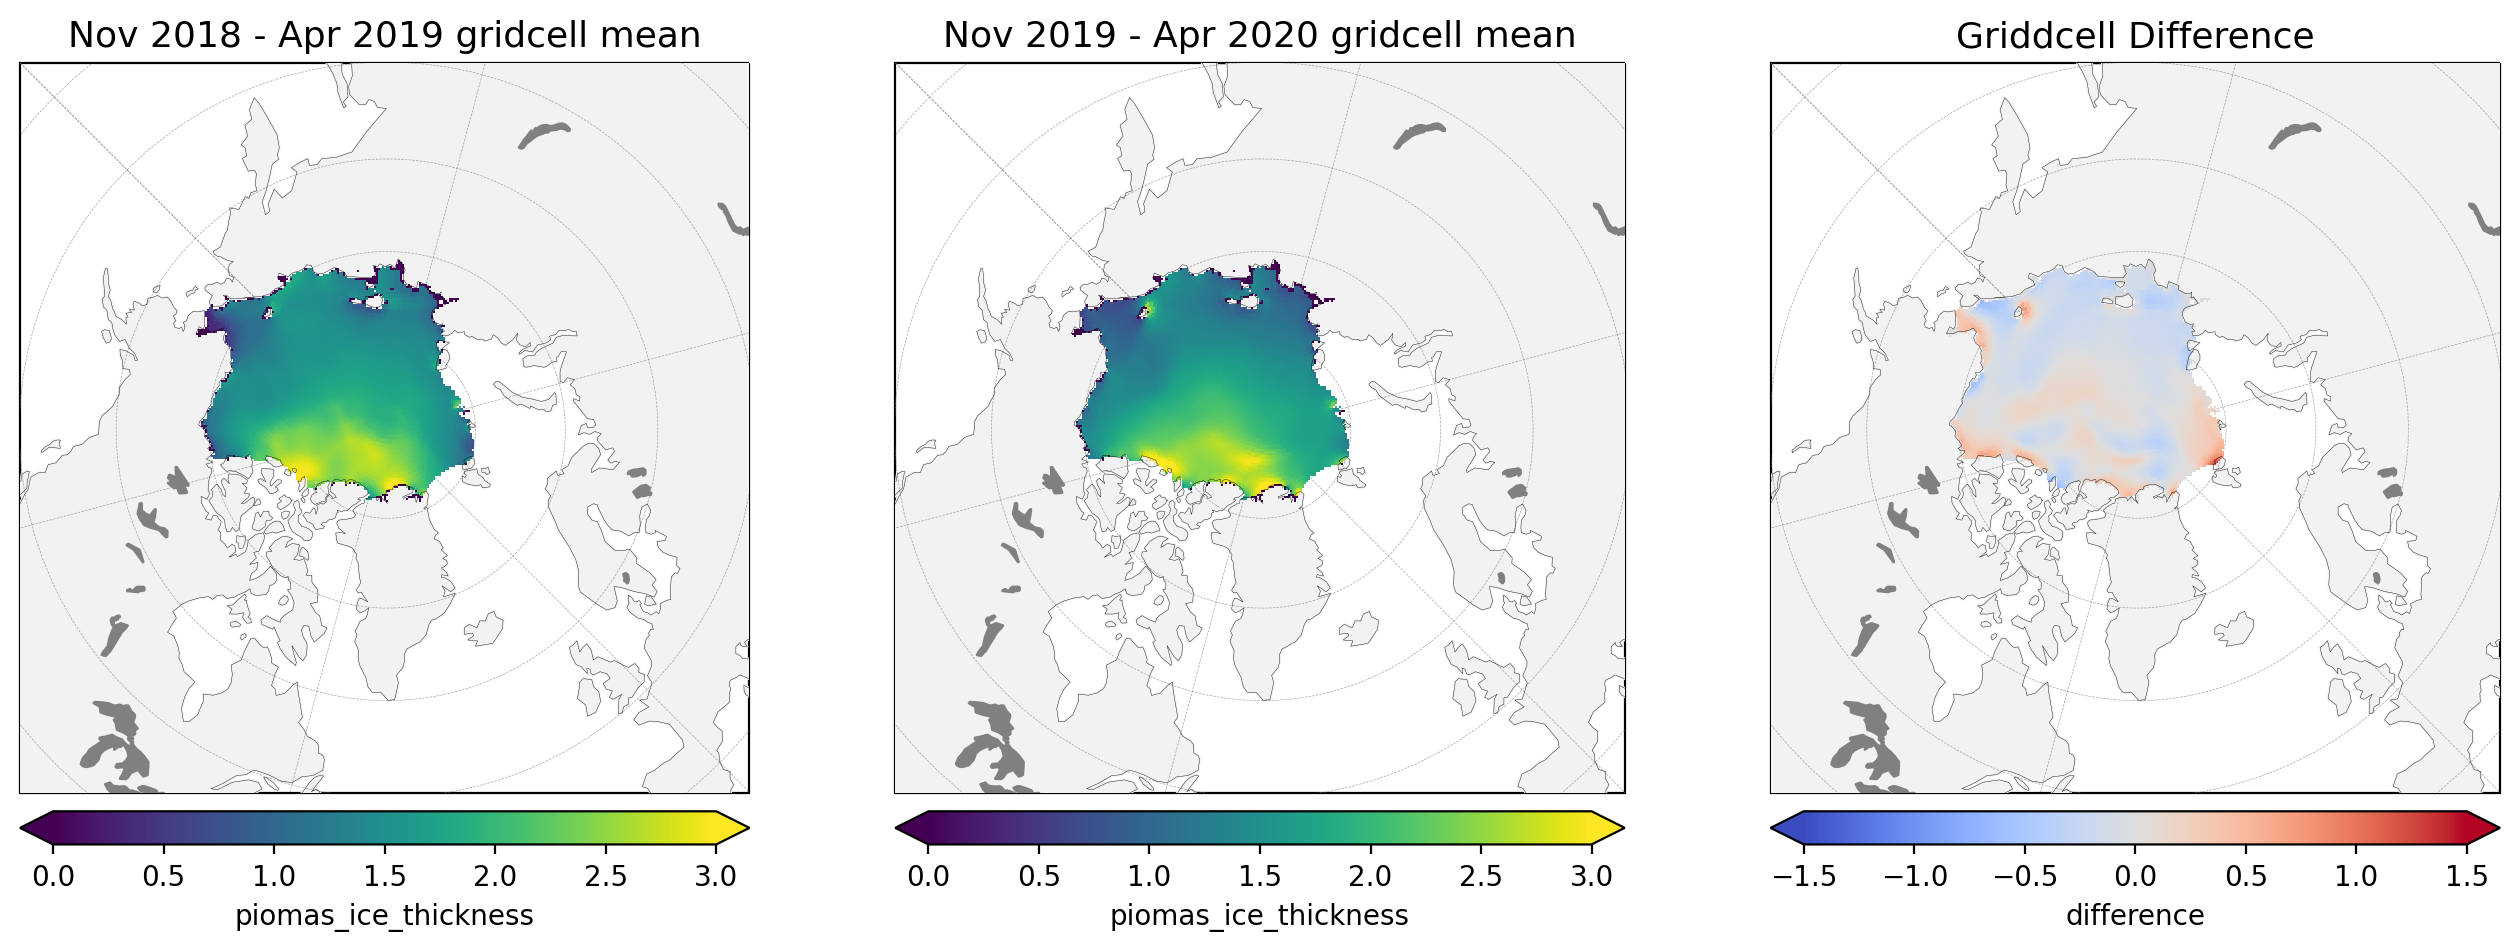

In [7]:
da_mean_winter18_19 = da.sel(time=pd.date_range(start="2018-11", end="2019-04", freq="MS")).mean(dim="time")
da_mean_winter19_20 = da.sel(time=pd.date_range(start="2019-11", end="2020-04", freq="MS")).mean(dim="time")

arcticComparisonMaps(data1=da_mean_winter18_19, title1="Nov 2018 - Apr 2019 gridcell mean", 
                     data2=da_mean_winter19_20, title2="Nov 2019 - Apr 2020 gridcell mean", 
                     vmin=0, vmax=3, vmin_diff=-1.5, vmax_diff=1.5)

## ICESat-2 snow depth

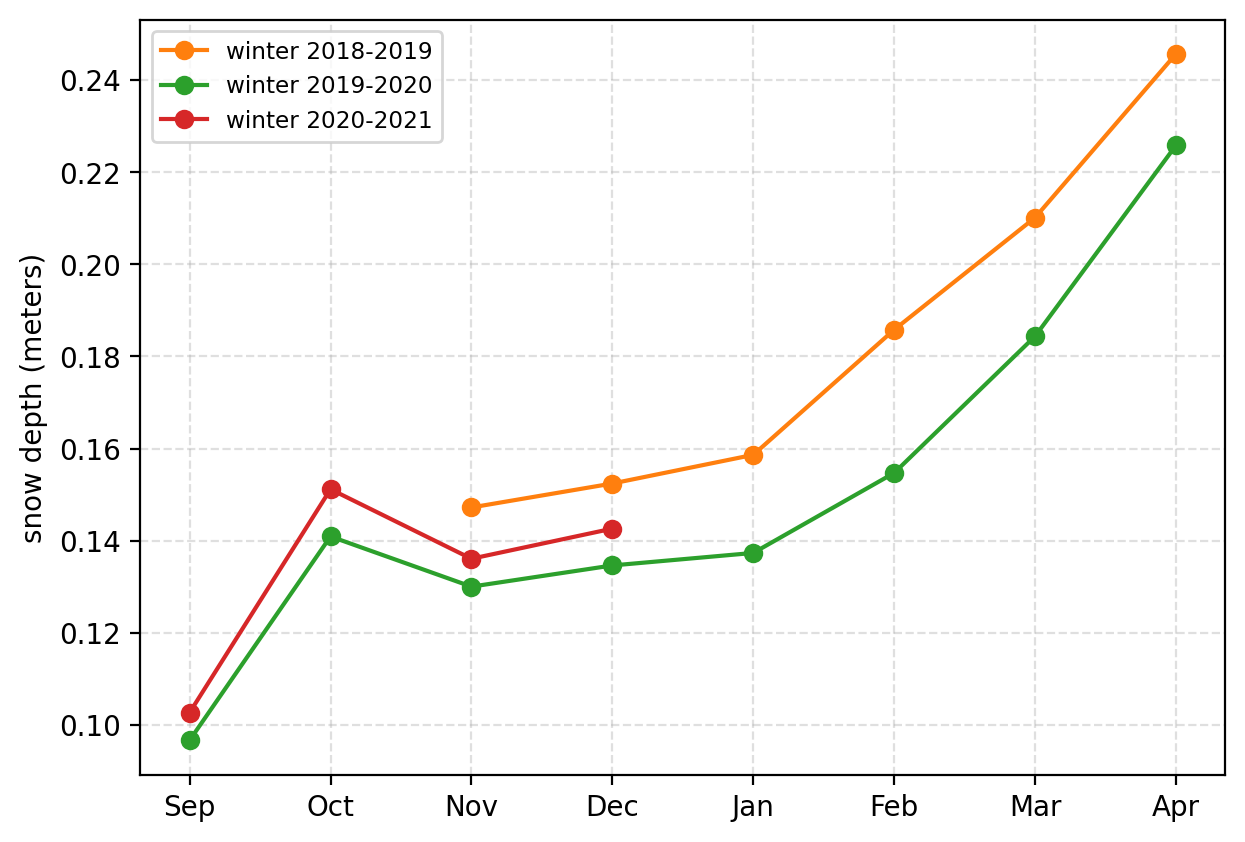

In [8]:
da = ds["snow_depth"]
plot_winter_means(da, start_year=start_year, end_year=end_year, show_uncertainty=False) # Generate line plot

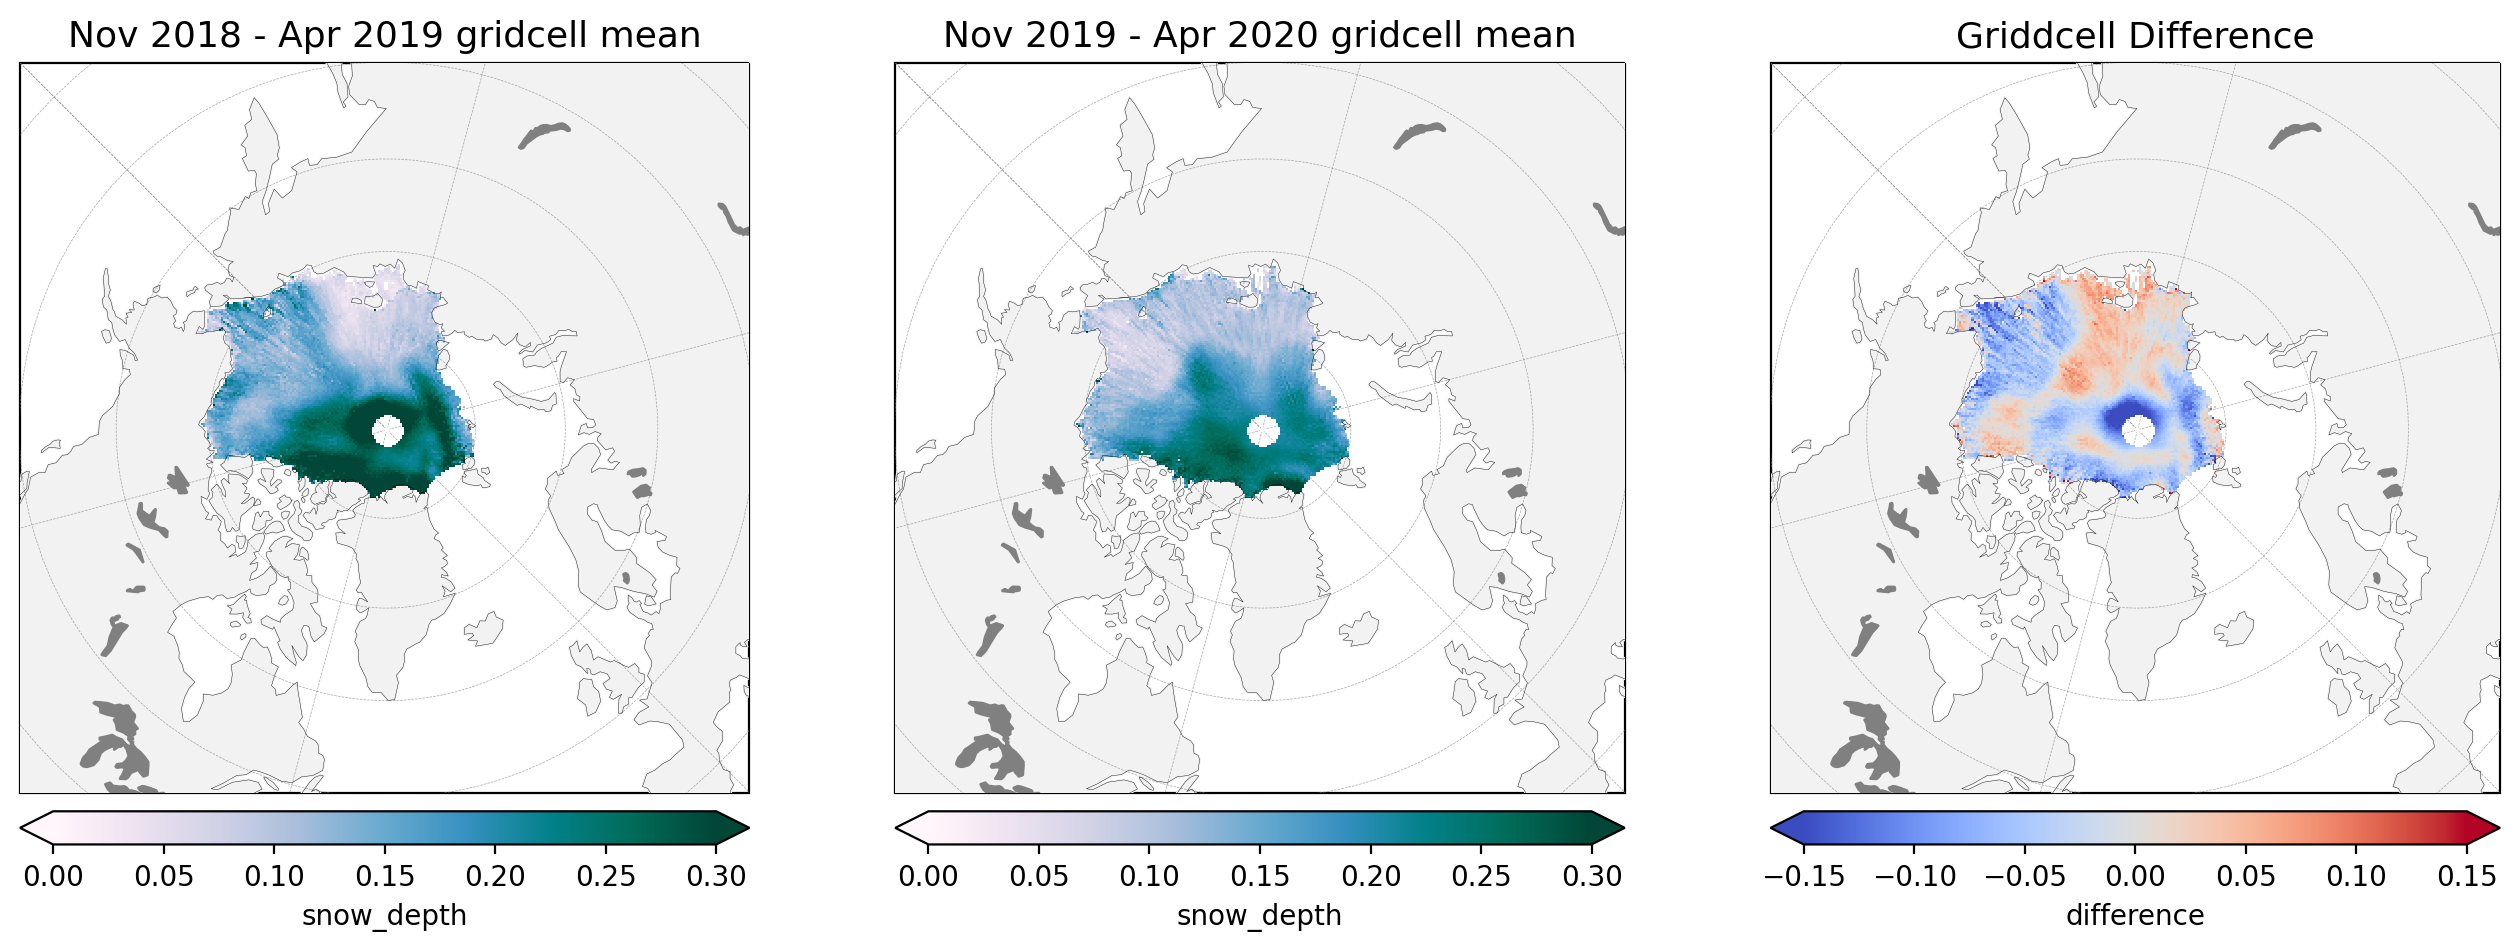

In [9]:
da_mean_winter18_19 = da.sel(time=pd.date_range(start="2018-11", end="2019-04", freq="MS")).mean(dim="time")
da_mean_winter19_20 = da.sel(time=pd.date_range(start="2019-11", end="2020-04", freq="MS")).mean(dim="time")

arcticComparisonMaps(data1=da_mean_winter18_19, title1="Nov 2018 - Apr 2019 gridcell mean", 
                     data2=da_mean_winter19_20, title2="Nov 2019 - Apr 2020 gridcell mean", 
                     vmin=0, vmax=0.3, vmin_diff=-0.15, vmax_diff=0.15, cmap="PuBuGn")

## OSI-SAF ice type
Ice type is categorized as a binary value of first year ice (0) or multi-year ice (1).

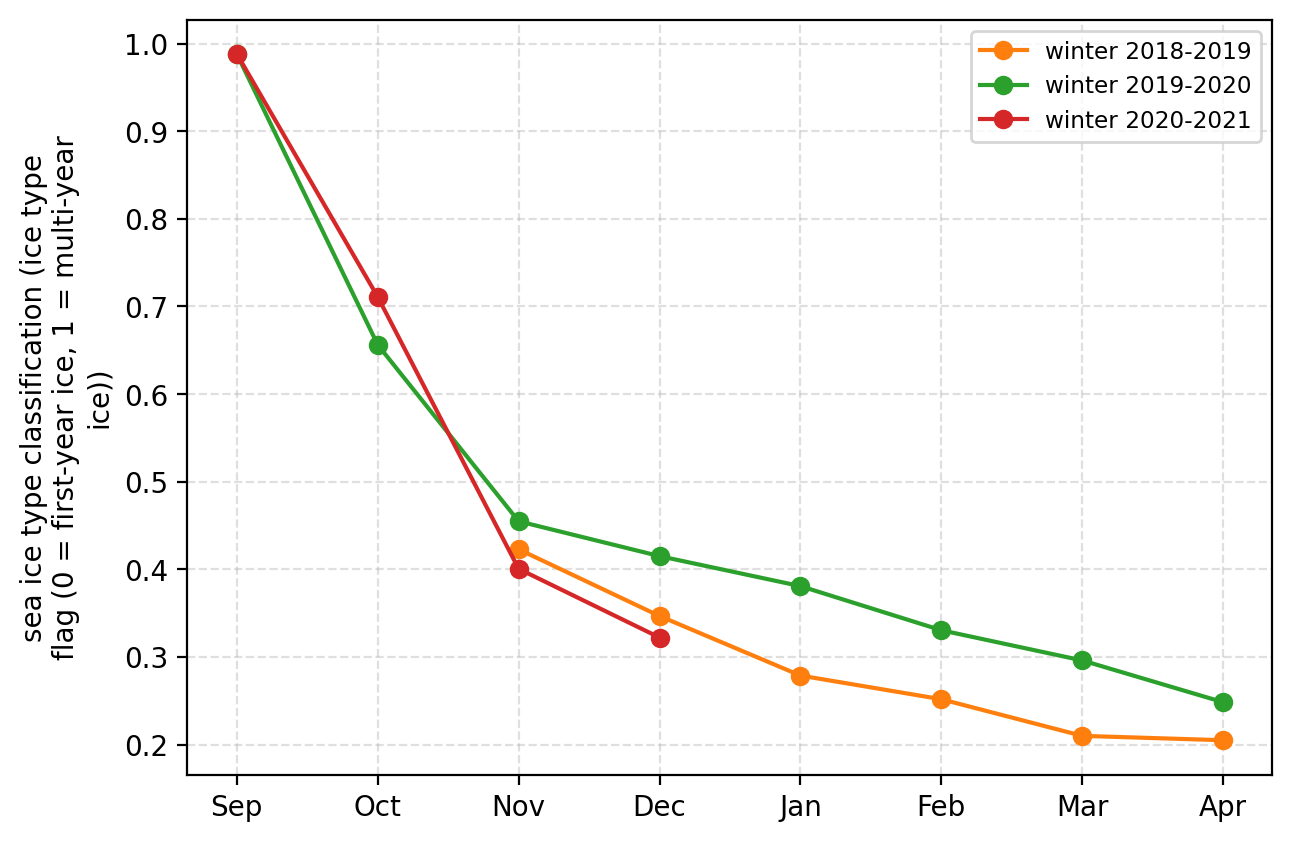

In [10]:
da = ds["ice_type"]
plot_winter_means(da, start_year=start_year, end_year=end_year, show_uncertainty=False) # Generate line plot

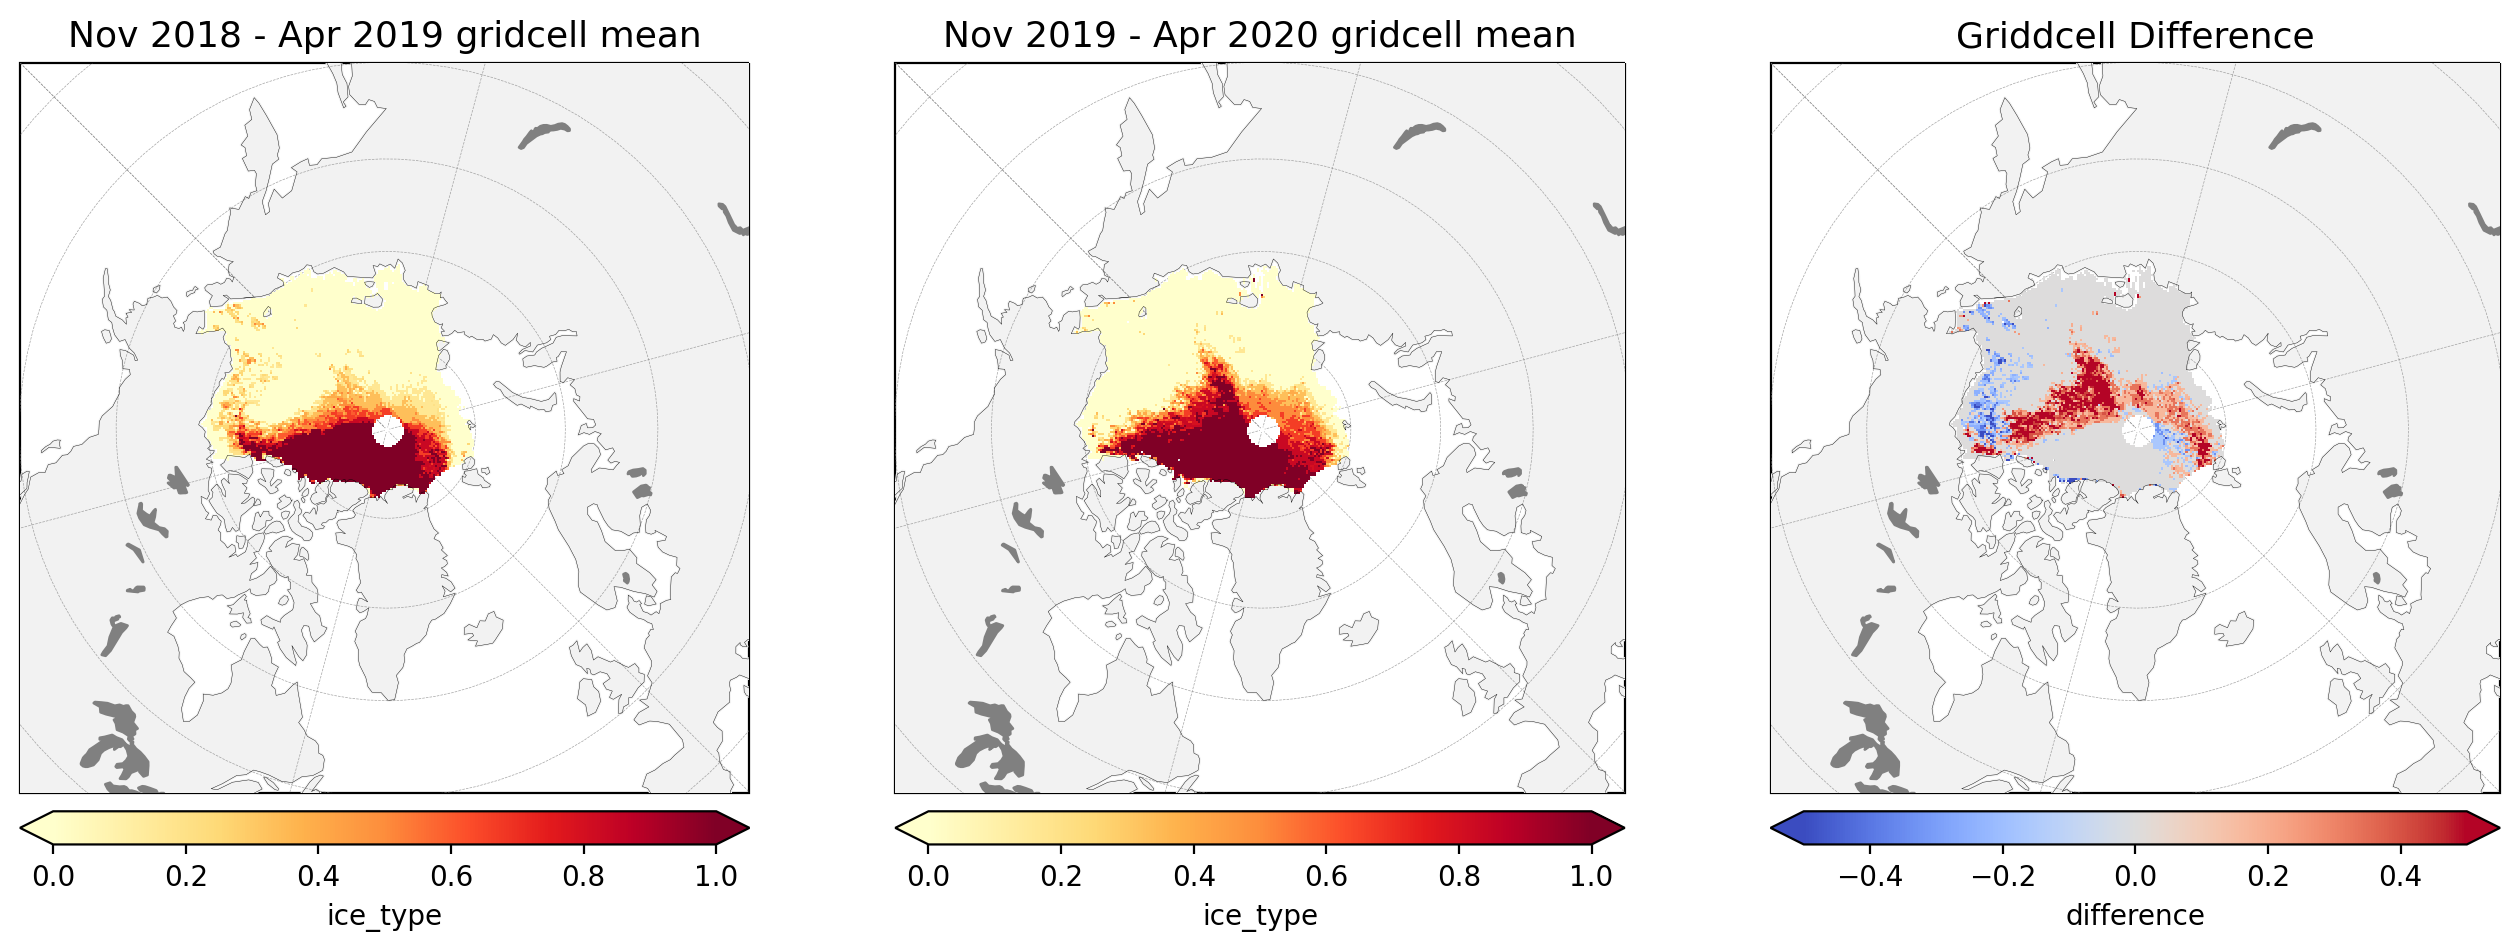

In [11]:
da_mean_winter18_19 = da.sel(time=pd.date_range(start="2018-11", end="2019-04", freq="MS")).mean(dim="time")
da_mean_winter19_20 = da.sel(time=pd.date_range(start="2019-11", end="2020-04", freq="MS")).mean(dim="time")

arcticComparisonMaps(data1=da_mean_winter18_19, title1="Nov 2018 - Apr 2019 gridcell mean", 
                     data2=da_mean_winter19_20, title2="Nov 2019 - Apr 2020 gridcell mean", 
                     vmin=0, vmax=1, vmin_diff=-0.5, vmax_diff=0.5, cmap="YlOrRd") 

## ERA5 2-meter temperature 

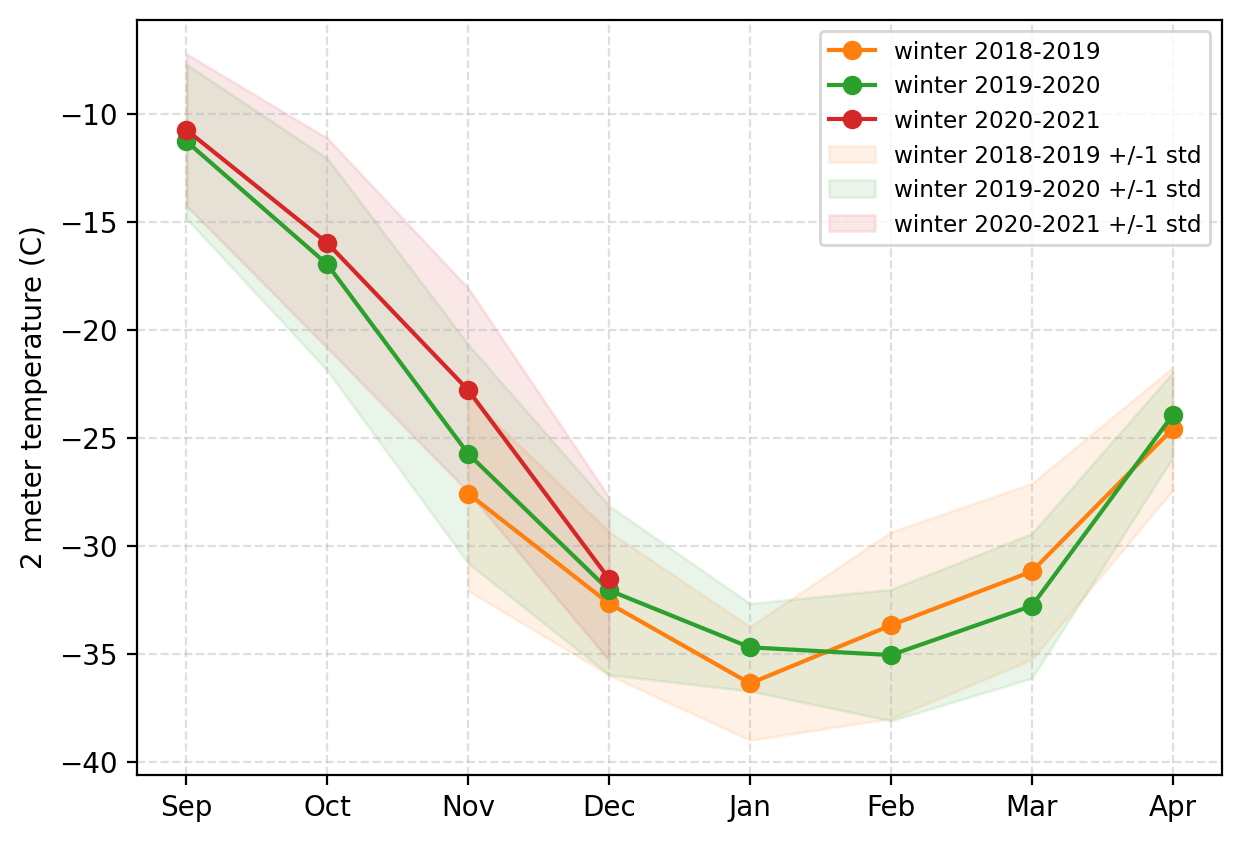

In [12]:
da = ds["t2m"]
plot_winter_means(da, start_year=start_year, end_year=end_year) # Generate line plot

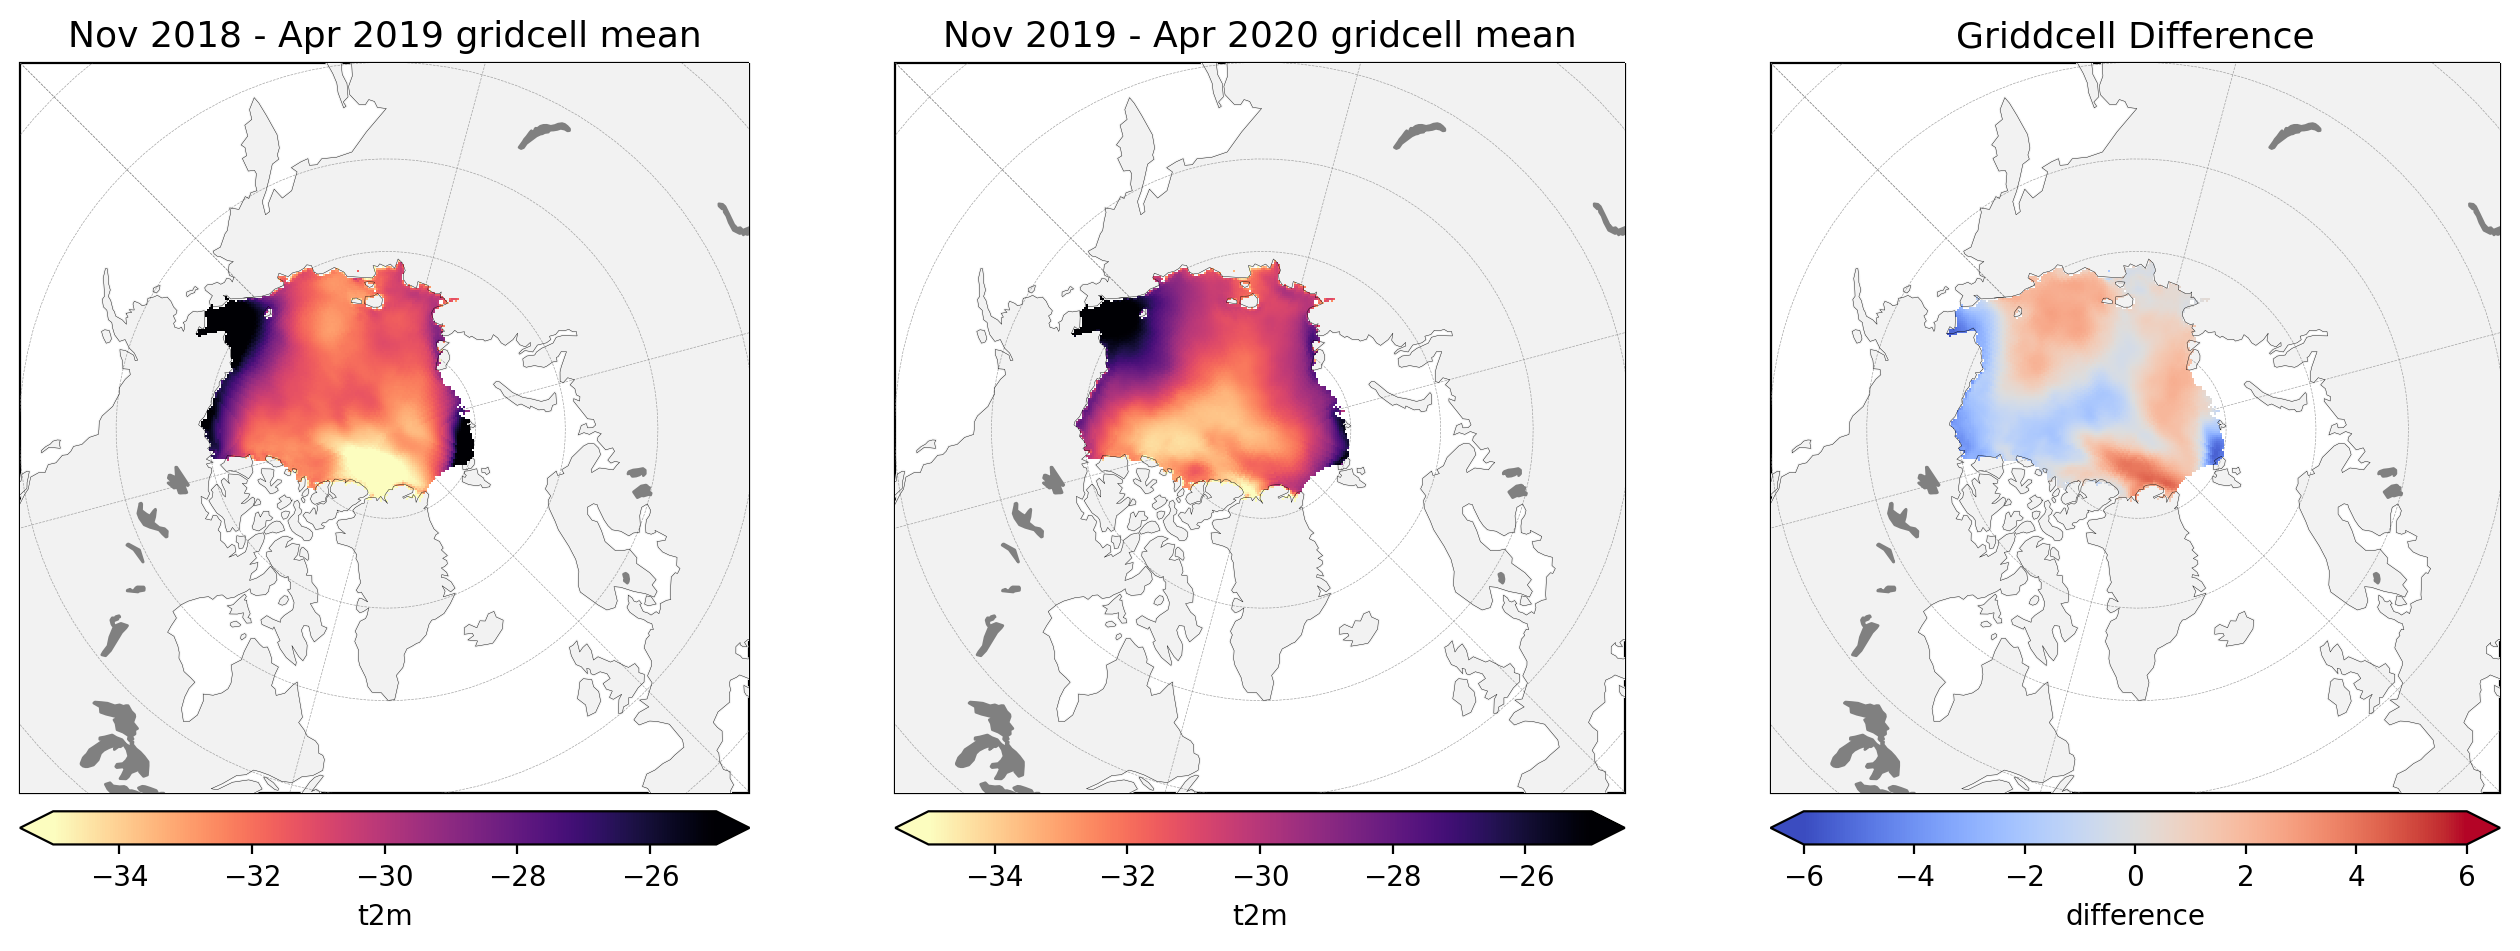

In [13]:
da_mean_winter18_19 = da.sel(time=pd.date_range(start="2018-11", end="2019-04", freq="MS")).mean(dim="time")
da_mean_winter19_20 = da.sel(time=pd.date_range(start="2019-11", end="2020-04", freq="MS")).mean(dim="time")

arcticComparisonMaps(data1=da_mean_winter18_19, title1="Nov 2018 - Apr 2019 gridcell mean", 
                     data2=da_mean_winter19_20, title2="Nov 2019 - Apr 2020 gridcell mean", 
                     vmin=-35, vmax=-25, vmin_diff=-6, vmax_diff=6, cmap="magma_r")

## ERA5 mean surface downward long-wave radiation flux

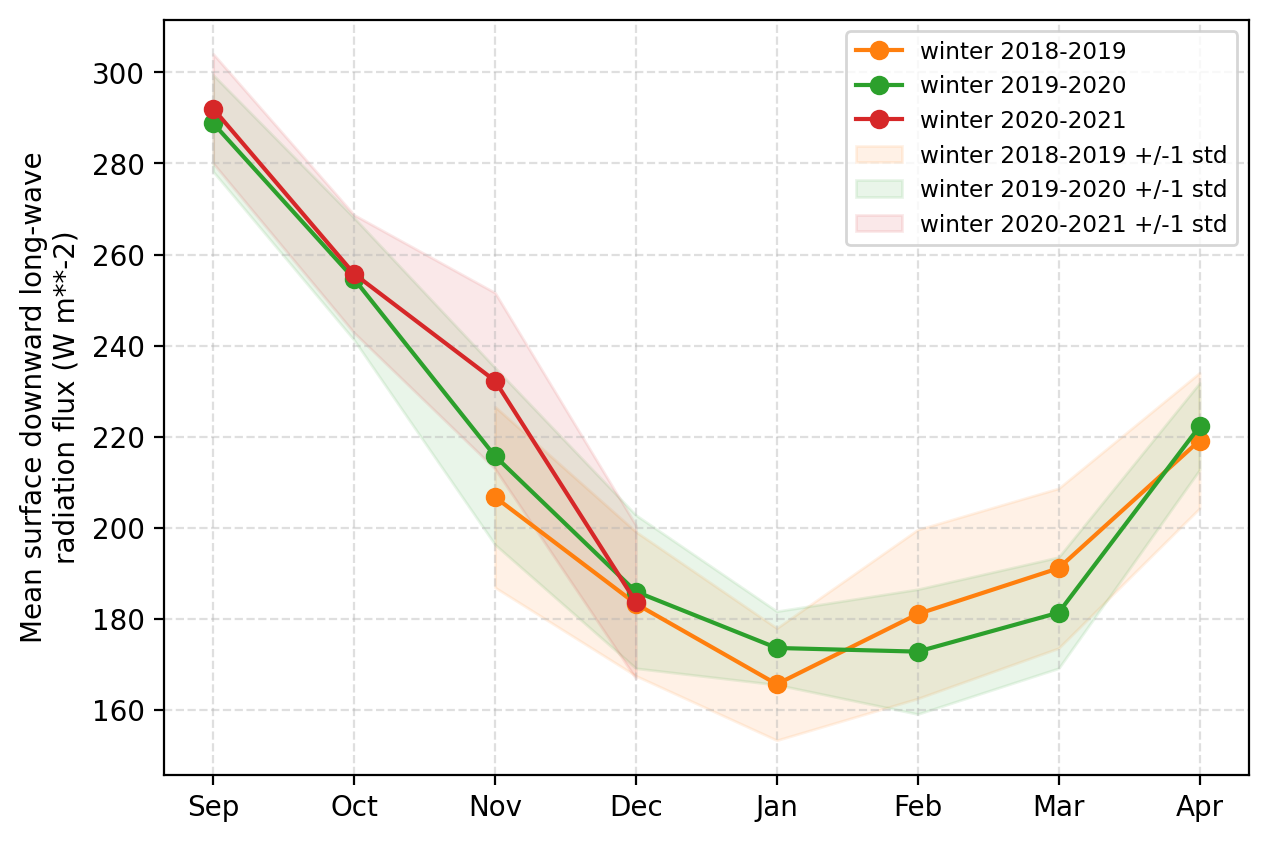

In [14]:
da = ds["msdwlwrf"]
plot_winter_means(da, start_year=start_year, end_year=end_year) # Generate line plot

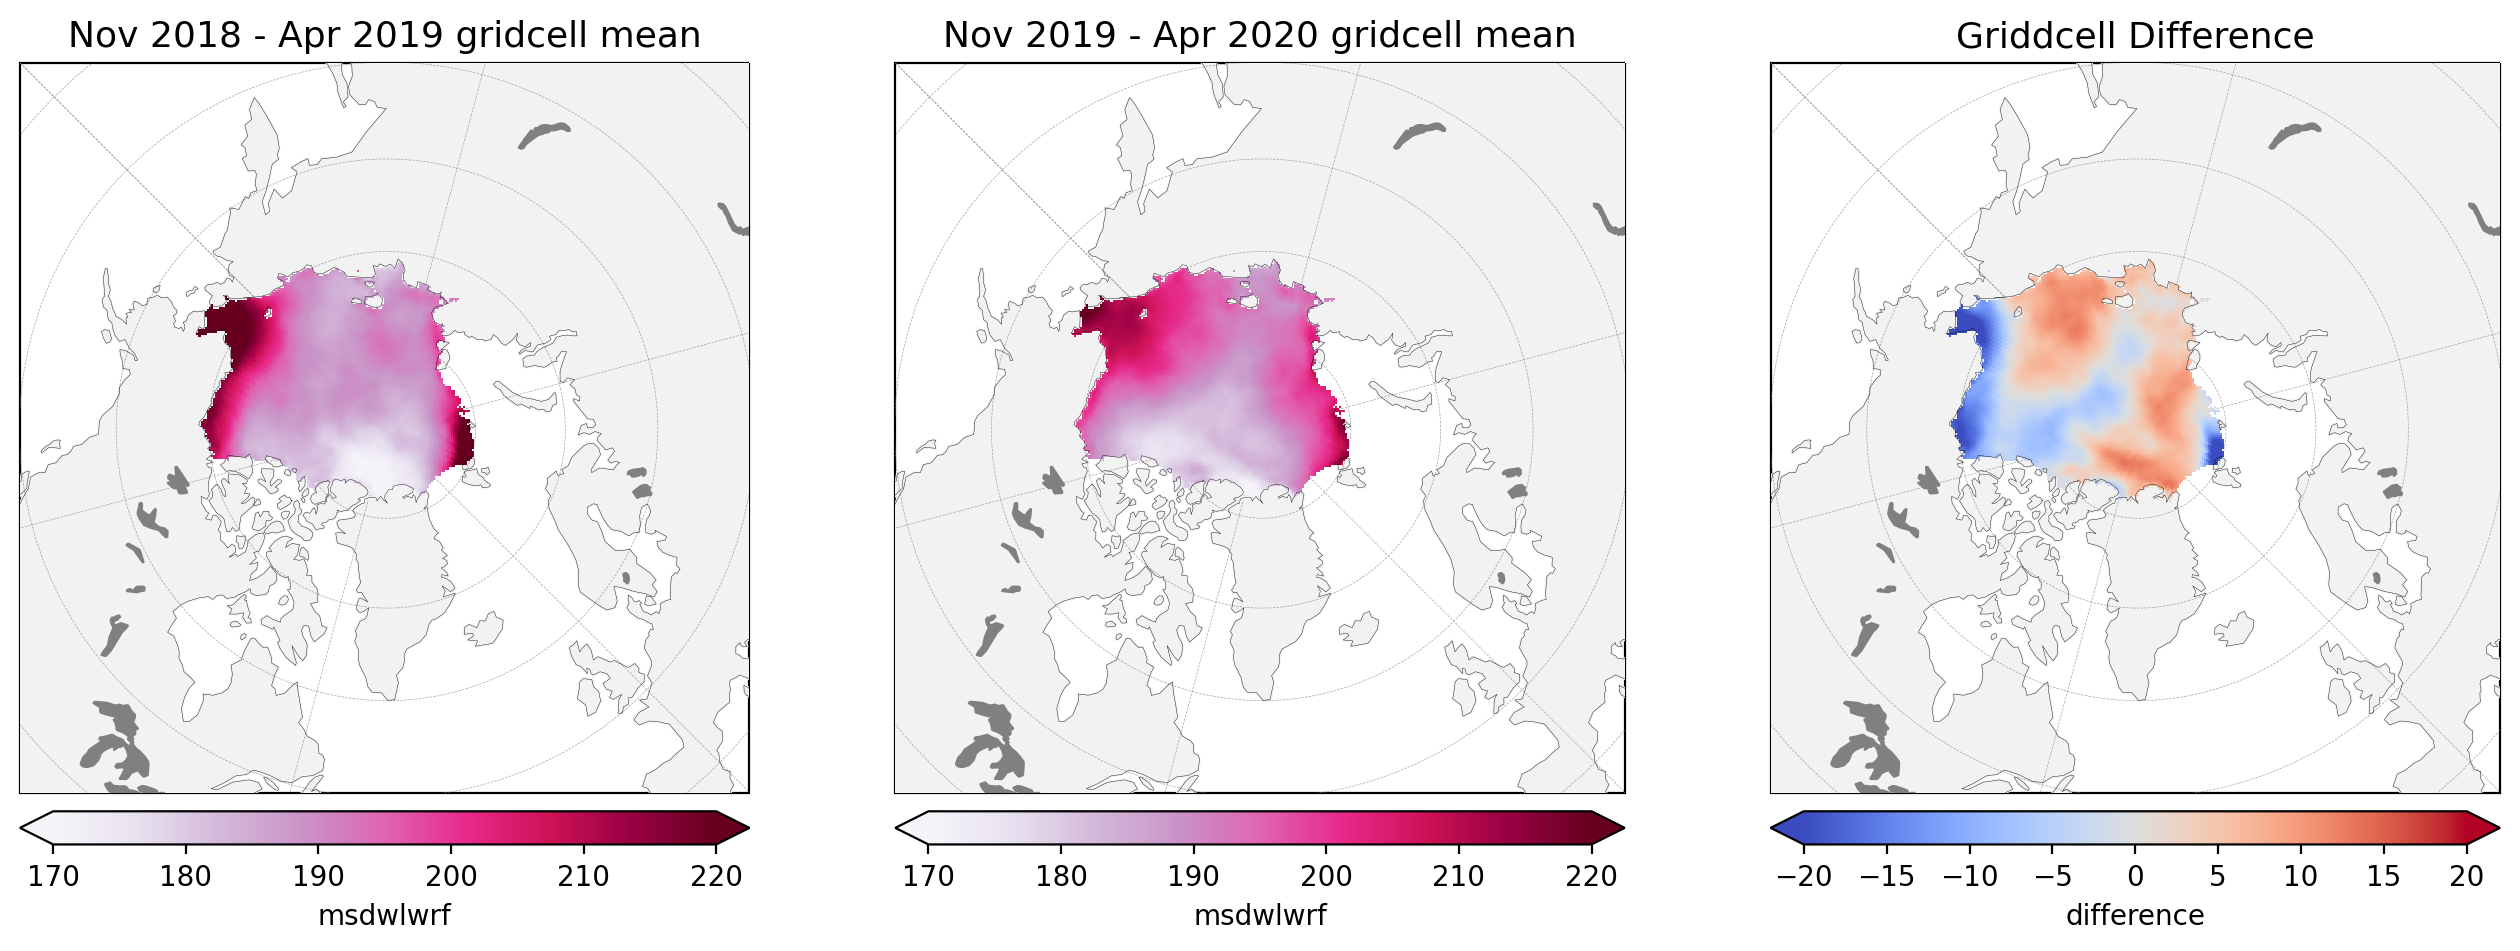

In [15]:
da_mean_winter18_19 = da.sel(time=pd.date_range(start="2018-11", end="2019-04", freq="MS")).mean(dim="time")
da_mean_winter19_20 = da.sel(time=pd.date_range(start="2019-11", end="2020-04", freq="MS")).mean(dim="time")

arcticComparisonMaps(data1=da_mean_winter18_19, title1="Nov 2018 - Apr 2019 gridcell mean", 
                     data2=da_mean_winter19_20, title2="Nov 2019 - Apr 2020 gridcell mean", 
                     vmin=170, vmax=220, vmin_diff=-20, vmax_diff=20, cmap="PuRd")